In [26]:
import ROOT as rt
import sys
sys.path.append("/blue/avery/rosedj1/HiggsMassMeasurement")
from Utils_ROOT.Printer import CanvasPrinter
from Utils_ROOT.ROOT_classes import make_TGraphErrors
import numpy as np
import matplotlib.pyplot as plt

xmin = -6
xmax = 15
ymin = -1
ymax = 5
interc_true = 0.5
slope_true = 0.25

xvals = np.linspace(xmin, xmax, 6)
yvals_true = interc_true + slope_true * xvals

gr_trueline = make_TGraphErrors(x=xvals, y=yvals_true, x_min=xmin, x_max=xmax, y_min=ymin, y_max=ymax)
yvals_skew = yvals_true + np.random.normal(0, 0.5, len(yvals_true))
gr_skew = make_TGraphErrors(x=xvals, y=yvals_skew, x_min=xmin, x_max=xmax, y_min=ymin, y_max=ymax, marker_color=1)

# Make fits.
plainline = rt.TF1("plainline", "[0]+[1]*x", xmin+3, xmax-3)
settozero = rt.TF1("settozero", "[0]+[1]*x", xmin+3, xmax-3)
settozero.FixParameter(0, 0.0)
nozero = rt.TF1("nozero", "[0]*x", xmin+3, xmax-3)

gr_skew.Fit(plainline, 'S')
gr_skew.Fit(settozero, 'S')
gr_skew.Fit(nozero, 'S')


****************************************
Minimizer is Minuit / Migrad
Chi2                      =     0.692771
NDf                       =            4
Edm                       =  1.01844e-23
NCalls                    =           31
p0                        =      0.46238   +/-   0.200565    
p1                        =     0.313778   +/-   0.0236863   

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      1.61325
NDf                       =            5
Edm                       =  3.37445e-18
NCalls                    =           13
p0                        =            0                      	 (fixed)
p1                        =     0.342798   +/-   0.0273862   

****************************************
Minimizer is Minuit / Migrad
Chi2                      =      1.61325
NDf                       =            5
Edm                       =  3.37445e-18
NCalls                    =           13
p0                        =     0.342

In [29]:
print(f"plainline: interc_err={plainline.GetParError(0)}, slope_err={plainline.GetParError(1)}")
print(f"settozero: interc_err={settozero.GetParError(0)}, slope_err={settozero.GetParError(1)}")
print(f"nozero:    interc_err=NONE,                       slope_err={nozero.GetParError(0)}")

plainline: interc_err=0.2005654033617732, slope_err=0.023686257240403335
settozero: interc_err=0.0, slope_err=0.02738615373243757
nozero:    interc_err=NONE,                       slope_err=0.02738615373243757


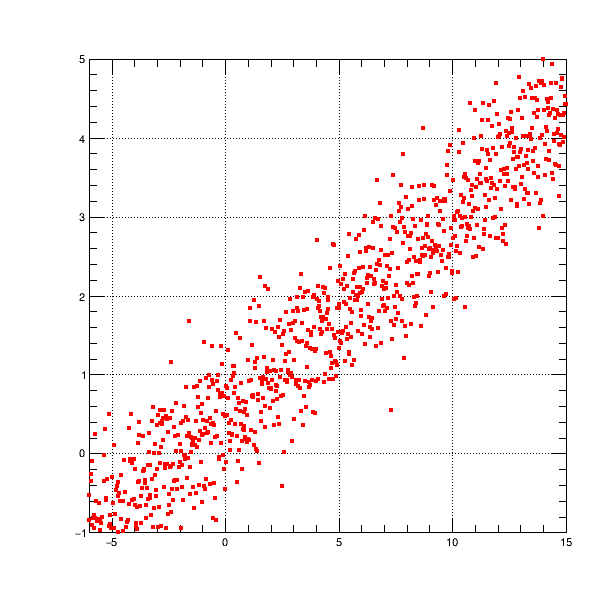

In [17]:
printer = CanvasPrinter(show_plots=False)
printer.make_plots_pretty()
# gr_trueline.Draw("ape")
gr_skew.Draw("ape")
printer.canv.Draw()

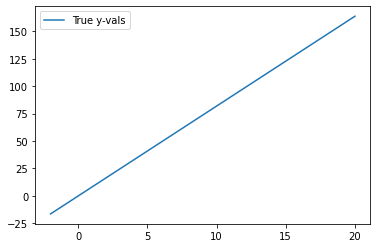

In [4]:
plt.plot(xvals, yvals_true, label="True y-vals")
plt.legend()